In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from sklearn.datasets import make_blobs

In [3]:
from sklearn.cluster import KMeans

In [4]:
from sklearn.metrics import silhouette_samples , silhouette_score

In [5]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [6]:
X , y = make_blobs ( n_samples = 500 ,
                   n_features = 2,
                   centers = 4 ,
                   cluster_std = 1,
                   center_box = (-10.0 ,10.0),
                   shuffle = True ,
                   random_state = 1)

In [7]:
range_n_clusters = [2,3,4,5,6]

In [8]:
w = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i , init = 'k-means++' , random_state=0)
    kmeans.fit(X)
    w.append(kmeans.inertia_)

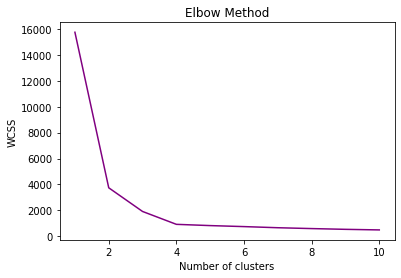

In [9]:
plt.plot(range(1,11),w ,color ='purple')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
clusterer = KMeans(n_clusters = 4 , random_state = 10)

In [11]:
cluster_label = clusterer.fit_predict(X)

In [12]:
cluster_label

array([2, 2, 3, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 1, 0, 3, 3,
       0, 1, 0, 0, 1, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 3, 2, 3, 0, 3, 1, 0,
       0, 2, 3, 0, 1, 1, 1, 3, 3, 0, 2, 3, 3, 3, 3, 0, 1, 1, 3, 0, 1, 0,
       2, 0, 3, 3, 2, 3, 0, 2, 0, 0, 2, 0, 0, 3, 1, 1, 3, 1, 1, 3, 3, 1,
       3, 3, 1, 2, 3, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 3, 1, 0, 0, 1, 1, 3,
       0, 2, 1, 3, 1, 3, 1, 0, 1, 0, 3, 2, 2, 3, 0, 3, 1, 2, 2, 0, 1, 3,
       3, 3, 3, 2, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 2, 2, 3, 3, 1, 2,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 2, 2, 0, 1, 2, 3, 0, 2, 1, 3,
       3, 3, 3, 2, 0, 3, 1, 2, 2, 3, 0, 2, 2, 0, 1, 1, 2, 2, 0, 1, 0, 2,
       2, 1, 2, 3, 1, 0, 0, 2, 0, 3, 2, 0, 3, 0, 3, 2, 0, 0, 0, 1, 3, 1,
       0, 2, 3, 0, 3, 3, 3, 1, 3, 1, 2, 3, 2, 3, 1, 1, 3, 2, 1, 2, 0, 3,
       2, 2, 2, 2, 0, 3, 2, 3, 0, 1, 1, 0, 0, 1, 3, 0, 3, 1, 0, 1, 3, 3,
       1, 0, 2, 2, 3, 3, 3, 0, 1, 1, 0, 1, 3, 2, 1, 2, 1, 2, 2, 1, 2, 1,
       1, 0, 3, 3, 3, 0, 0, 3, 2, 1, 2, 2, 2, 0, 3,

For n_clusters =  2 The average silhoutte_score is:  0.7049787496083262
For n_clusters =  3 The average silhoutte_score is:  0.5882004012129721
For n_clusters =  4 The average silhoutte_score is:  0.6505186632729437
For n_clusters =  5 The average silhoutte_score is:  0.56376469026194
For n_clusters =  6 The average silhoutte_score is:  0.4504666294372765


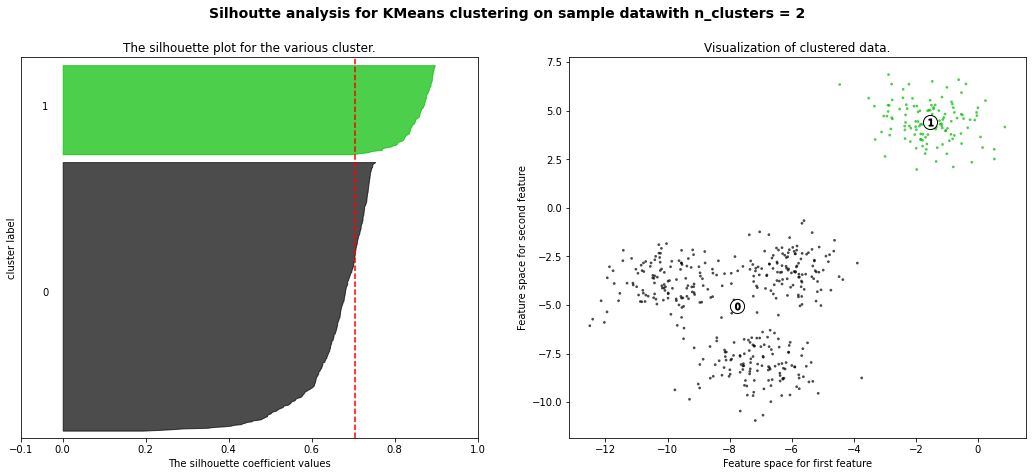

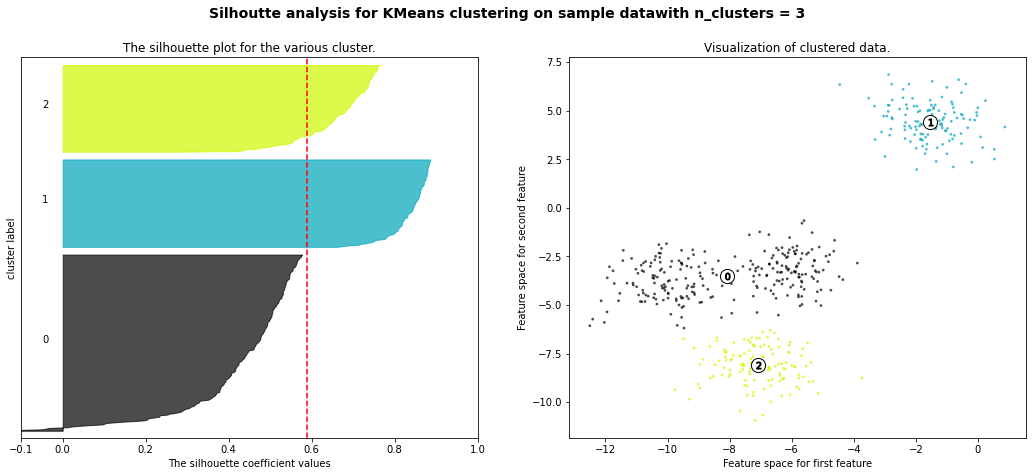

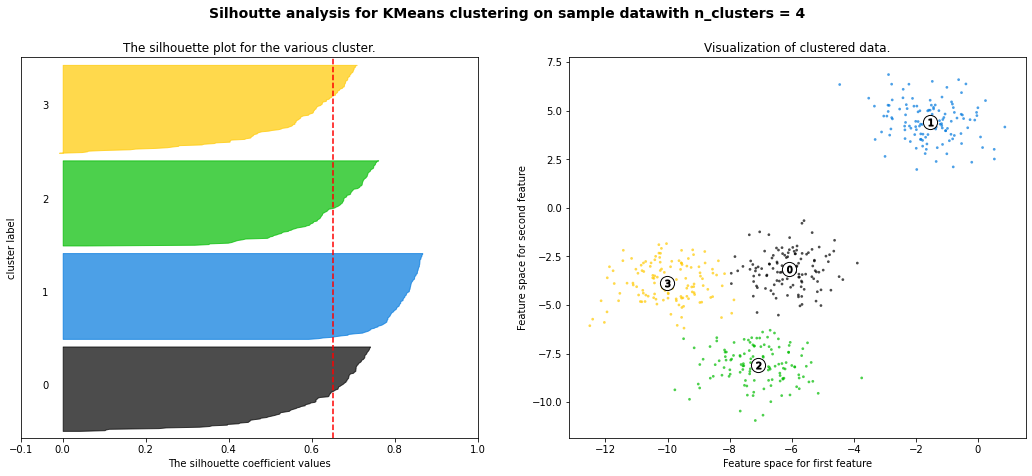

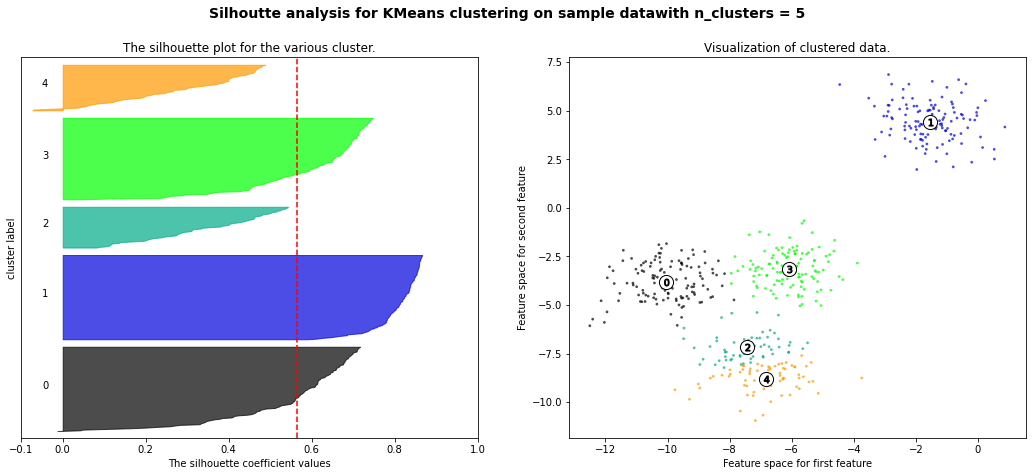

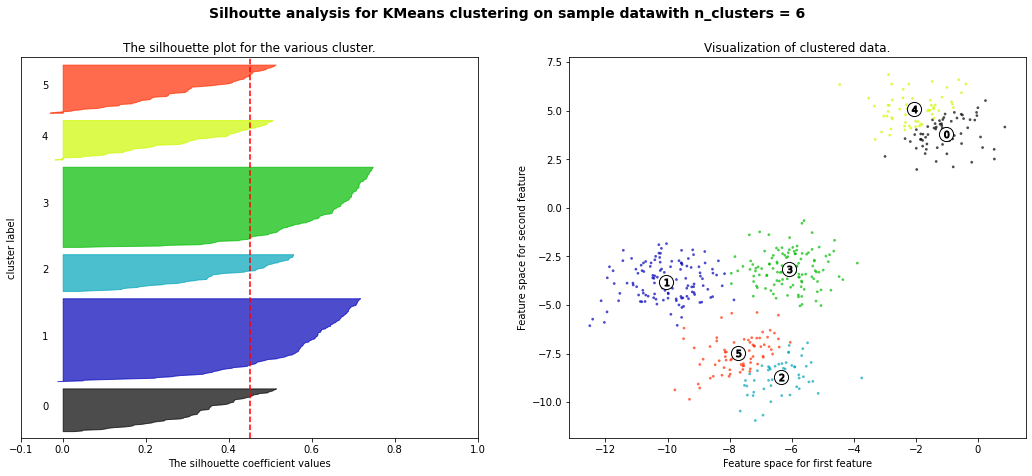

In [13]:
for n_clusters in range_n_clusters:
    fig,(ax1,ax2) = plt.subplots(1,2)
    fig.set_size_inches(18,7)
    ax1.set_xlim([-0.1,1])
    ax1.set_ylim([0,len(X)+ (n_clusters + 1)*10])
    clusterer = KMeans(n_clusters = n_clusters , random_state = 10)
    cluster_label = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X,cluster_label)
    print('For n_clusters = ' , n_clusters,
         'The average silhoutte_score is: ',silhouette_avg)
    sample_silhouette_values = silhouette_samples(X,cluster_label)
    y_lower =10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
           sample_silhouette_values[cluster_label == i]
        
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower+size_cluster_i
        
        color = cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)
        ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i))
        y_lower = y_upper+10
        
    ax1.set_title('The silhouette plot for the various cluster.')
    ax1.set_xlabel('The silhouette coefficient values')
    ax1.set_ylabel('cluster label')
    ax1.axvline(x=silhouette_avg,color='red',linestyle='--')
    ax1.set_yticks([])
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
    colors = cm.nipy_spectral(cluster_label.astype(float)/n_clusters)
    ax2.scatter(X[:,0],X[:,1],marker='.',lw=0,c=colors ,alpha=0.7,s=30,edgecolor='k')
    centers=clusterer.cluster_centers_
    colors = cm.nipy_spectral(cluster_label.astype(float)/n_clusters)
    ax2.scatter(centers[:,0],centers[:,1],marker='o',c='white' ,alpha=1,s=200,edgecolor='k')
   
    for i,c in enumerate(centers):
        ax2.scatter(c[0],c[1],marker='$%d$' % i ,alpha=1,s=50,edgecolor='k')
    ax2.set_title('Visualization of clustered data.')
    ax2.set_xlabel('Feature space for first feature')
    ax2.set_ylabel('Feature space for second feature')
    plt.suptitle(('Silhoutte analysis for KMeans clustering on sample data'
                'with n_clusters = %d'%n_clusters ),fontsize=14,fontweight='bold')